In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('./DatasetCleaning.csv')

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
data.head()

,IS_top_5_league,Based_rich_nation,Is_top_ranked_nation,EU_National,Caps,Apps,Age,Reputation,Is_top_prev_club,Last_Transfer_Fee,Salary
0,0,1,2,1,1.000,0.842303,0.750000,0.761709,0,0,203478000.0
1,0,1,2,1,0.485,0.694618,0.642857,0.824121,0,0,199452000.0
2,0,1,2,1,0.620,0.425532,0.500000,0.899497,1,0,149589000.0
3,0,1,2,0,0.000,0.306633,0.285714,0.740101,0,0,74157000.0
4,1,1,2,1,0.350,0.276596,0.250000,0.941206,0,0,48467000.0


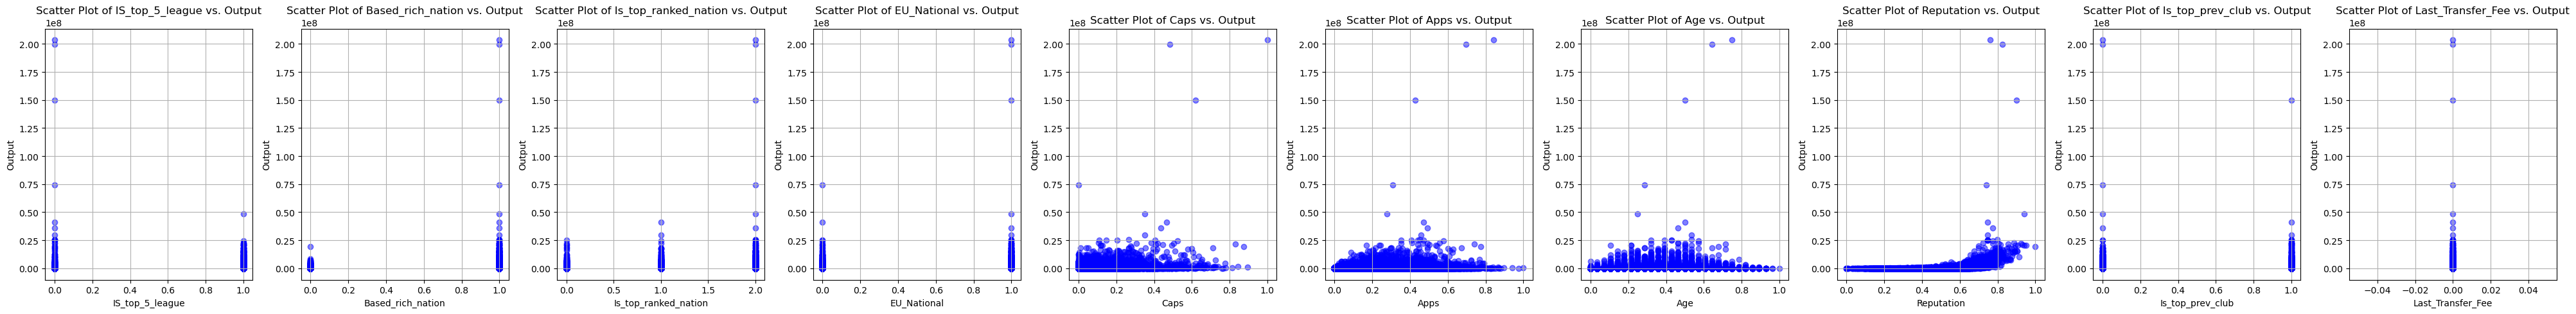

In [3]:
# Extract input features (X) and output (y)
X = data.iloc[:, :-1]  # All input attributes
y = data.iloc[:, -1]   # Outputdf[columns_to_scale] = scaler.inverse_transform(df[columns_to_scale])


# Get the names of input attributes
input_attributes = list(X.columns)

# Create scatter plots for each input attribute
num_cols = len(input_attributes)
num_rows = 1  # You can adjust this based on the number of attributes and your preference for plot layout

fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 5))  # Adjust figure size as needed

for i, attr in enumerate(input_attributes):
    if num_rows == 1:
        ax = axs[i]
    else:
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
    
    ax.scatter(X[attr], y, color='blue', alpha=0.5)  # Adjust color and transparency as needed
    ax.set_xlabel(attr)
    ax.set_ylabel('Output')
    ax.set_title(f'Scatter Plot of {attr} vs. Output')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [4]:
max_salary = np.max(data[['Salary']])
min_salary = np.min(data[['Salary']])

# Print the maximum and minimum salaries
print("Max Salary:", max_salary)
print("Min Salary:", min_salary)

Max Salary: 203478000.0
Min Salary: 180.0


## Split the dataset into features (X) and target variable (Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train ,Y_test =train_test_split(X,y, test_size=0.3,random_state=0)

## training model

In [6]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

# print(regressor.score(X_train,Y_train))
# print(regressor.score(X_test,Y_test))

DecisionTreeRegressor()

### Calculate Mean Squared Error (MSE)

In [7]:
from sklearn.metrics import mean_squared_error
Y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(error)
print("${:,.02f}".format(error))


2055635.4136225036
$2,055,635.41


## Random Forest Regressor model 

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

### Calculate Mean Squared Error (MSE)

In [9]:
from sklearn.metrics import mean_squared_error
Y_pred = rf_regressor.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("${:,.02f}".format(error))


$1,023,666.32


## Linear Model 

In [10]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

# print(linear_model.score(X_train,Y_train))
# print(linear_model.score(X_test,Y_test))

LinearRegression()

### Calculate Mean Squared Error (MSE)

In [11]:
from sklearn.metrics import mean_squared_error
Y_pred = linear_model.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("${:,.02f}".format(error))


$1,189,759.99


## SVM

In [12]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')  # Using linear kernel for simplicity
svr_model.fit(X_train, Y_train)

SVR(kernel='linear')

## Mean Squared Error

In [13]:
from sklearn.metrics import mean_squared_error
y_pred = svr_model.predict(X_test)

error = mean_squared_error(Y_test, y_pred)
print("${:,.02f}".format(error))


$1,931,673,634,570.73


## Visualising the Training set results

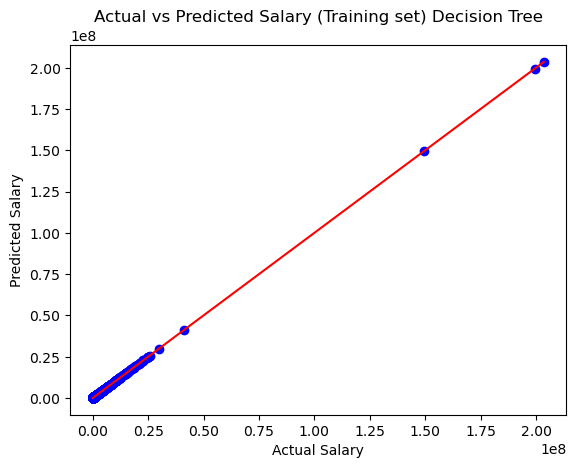

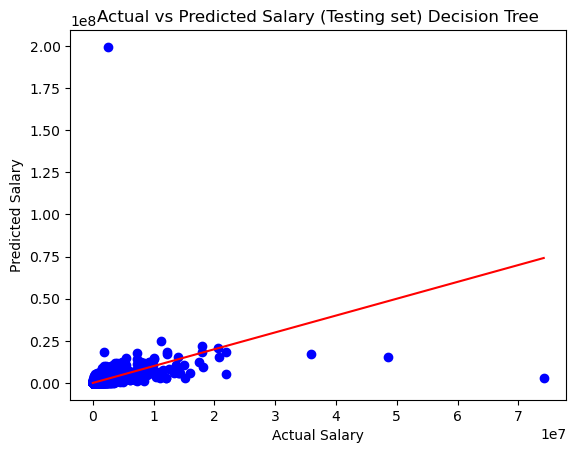

In [33]:
plt.scatter(Y_train, regressor.predict(X_train), color='blue')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Training set) Decision Tree')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

plt.scatter(Y_test, regressor.predict(X_test), color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Testing set) Decision Tree')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


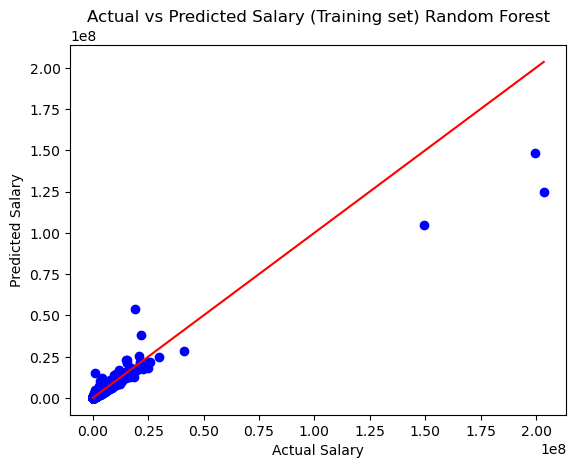

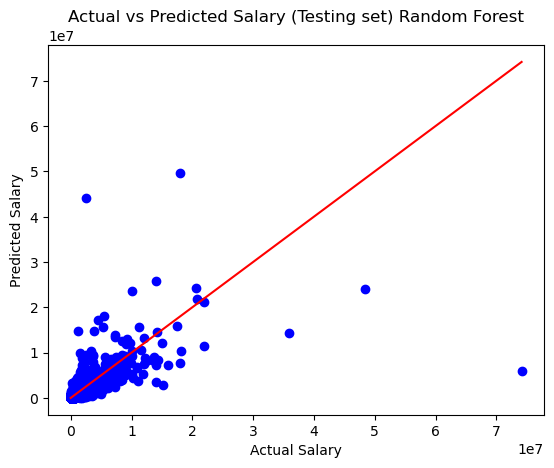

In [34]:
plt.scatter(Y_train, rf_regressor.predict(X_train), color='blue')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Training set) Random Forest')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

plt.scatter(Y_test, rf_regressor.predict(X_test), color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Testing set) Random Forest')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

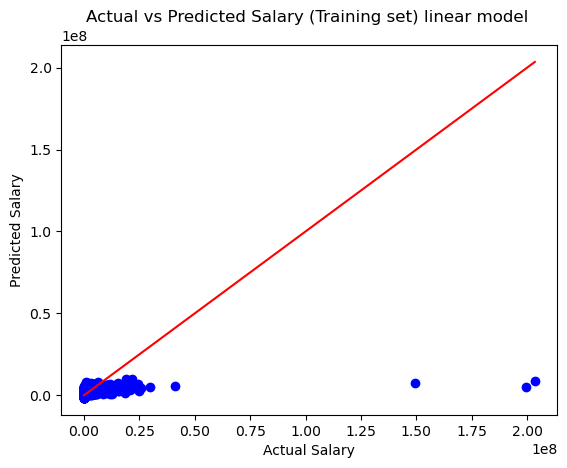

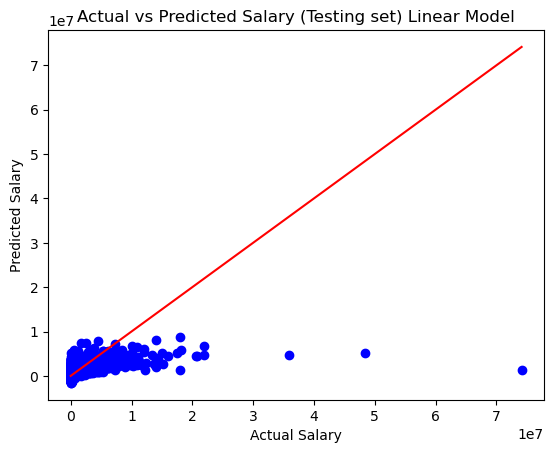

In [35]:
plt.scatter(Y_train, linear_model.predict(X_train), color='blue')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Training set) linear model ')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

plt.scatter(Y_test, linear_model.predict(X_test), color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Testing set) Linear Model')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

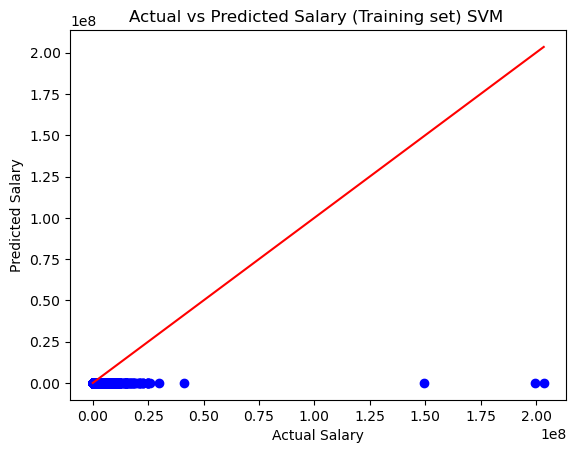

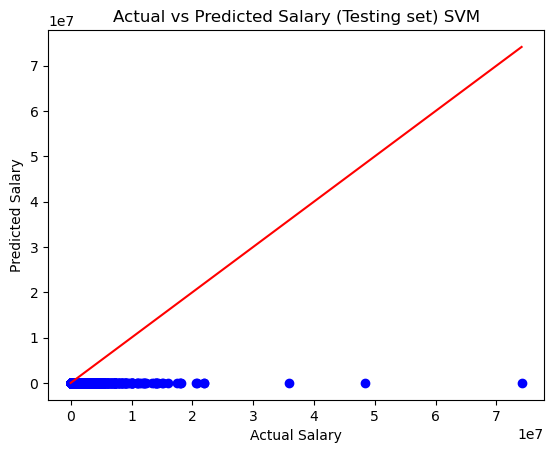

In [36]:
plt.scatter(Y_train, svr_model.predict(X_train), color='blue')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Training set) SVM ')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

plt.scatter(Y_test, svr_model.predict(X_test), color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-')
plt.title('Actual vs Predicted Salary (Testing set) SVM')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

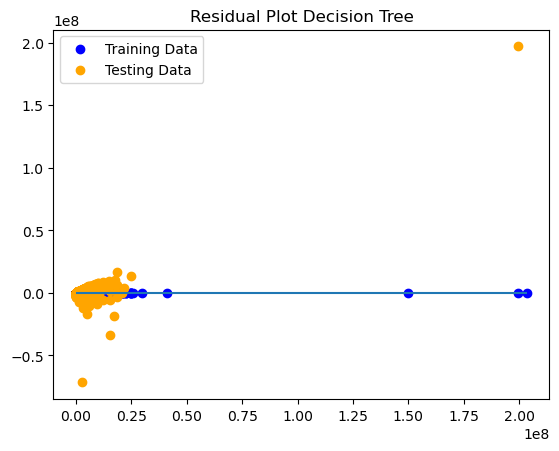

In [37]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot Decision Tree")
plt.show()

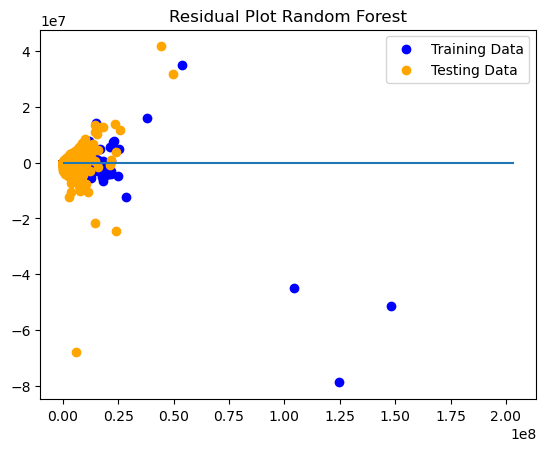

In [38]:
plt.scatter(rf_regressor.predict(X_train), rf_regressor.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(rf_regressor.predict(X_test), rf_regressor.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot Random Forest")
plt.show()

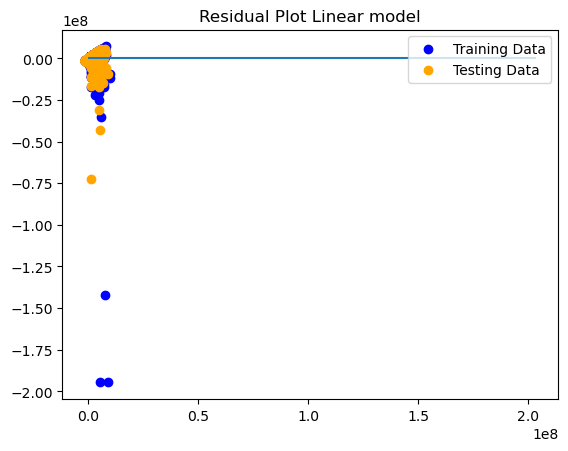

In [39]:
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot Linear model")
plt.show()

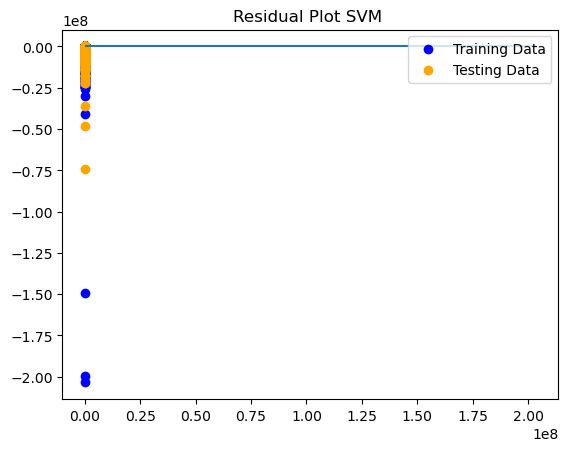

In [40]:
plt.scatter(svr_model.predict(X_train), svr_model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(svr_model.predict(X_test), svr_model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot SVM ")
plt.show()